In [1]:
import pandas as pd
from pandas import read_csv

In [2]:
original_data = read_csv('Seasons_Stats.csv')
#1997 data
rows_1997 = [i for i in range(len(original_data)) if original_data['Year'][i] == 1997]
data_1997 = original_data.iloc[rows_1997,:]
columns = data_1997.columns.values
name_set = data_1997.iloc[:,2]
df_1997 = data_1997.iloc[:2,:]
name_1997 = ['Mahmoud Abdul-Rauf','Shareef Abdur-Rahim']
for idx,name in enumerate(name_set):
    if name not in name_1997:
        l=len(str(data_1997.iloc[idx,3]))
        if l <= 2:
            name_1997.append(name)
            df_1997 = df_1997.append(data_1997.iloc[idx,:],ignore_index=True)
#print(len(df_1997))
#441 data point for 1997

#2017 data
rows_2017 = [i for i in range(len(original_data)) if original_data['Year'][i] == 2017]
data_2017 = original_data.iloc[rows_2017,:]
columns = data_2017.columns.values
name_set = data_2017.iloc[:,2]
df_2017 = data_2017.iloc[:2,:]
name_2017 = ['Alex Abrines','Quincy Acy']
for idx,name in enumerate(name_set):
    if name not in name_2017:
        if len(str(data_2017.iloc[idx,3])) <= 2:
            name_2017.append(name)
            df_2017 = df_2017.append(data_2017.iloc[idx,:],ignore_index=True)
#print(len(df_2017))
#486 data point for 2017
print(set(df_2017.iloc[:,3]))

#test 1996 data
rows_1996 = [i for i in range(len(original_data)) if original_data['Year'][i] == 1996]
data_1996 = original_data.iloc[rows_1996,:]
columns = data_1996.columns.values
name_set = data_1996.iloc[:,2]
df_1996 = data_1996.iloc[:2,:]
name_1996 = []
for idx,name in enumerate(name_set):
    if name not in name_1996:
        l=len(str(data_1996.iloc[idx,3]))
        if l <= 2:
            name_1996.append(name)
            df_1996 = df_1996.append(data_1996.iloc[idx,:],ignore_index=True)
#print(len(df_1996))

#test 2016 data
rows_2016 = [i for i in range(len(original_data)) if original_data['Year'][i] == 2016]
data_2016 = original_data.iloc[rows_2016,:]
columns = data_2016.columns.values
name_set = data_2016.iloc[:,2]
df_2016 = data_2016.iloc[:2,:]
name_2016 = []
for idx,name in enumerate(name_set):
    if name not in name_2016:
        if len(str(data_2016.iloc[idx,3])) <= 2:
            name_2016.append(name)
            df_2016 = df_2016.append(data_2016.iloc[idx,:],ignore_index=True)
#print(len(df_2016))

{'PG', 'PF', 'SF', 'SG', 'C'}


In [3]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegressionCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
from sklearn.metrics import confusion_matrix

In [4]:
Pos = df_2017.iloc[:,3]
features_0 = df_2017.iloc[:,4:5].join(df_2017.iloc[:,13:19]).join(df_2017.iloc[:,22:26]).join(df_2017.iloc[:,28:33]).join(df_2017.iloc[:,35:36]).join(
df_2017.iloc[:,38:39]).join(df_2017.iloc[:,41:43])
kf = KFold(n_splits=10)

A = []
for i in range(1,20):
    features = features_0.iloc[:,:i]
    a = 0
    for train, test in kf.split(features):
        #print('TRAIN: ',train,'test: ',test)
        X_train, X_test = features.iloc[train,:], features.iloc[test,:]
        y_train, y_test = Pos[train], Pos[test]
    
        clf = LinearDiscriminantAnalysis()
        clf.fit(X_train,y_train)
        #print(clf.score(X_train,y_train))
        y_p = clf.predict(X_test)
        c_m = confusion_matrix(y_test,y_p,labels=["SG","PG","SF","C","PF"])
        accuracy = np.sum(c_m.diagonal())/np.sum(c_m)
        #print(accuracy)
        a += accuracy
    
    A.append(a/10)
print(A)

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/skle

[0.17295918367346938, 0.42814625850340127, 0.45688775510204077, 0.4570578231292517, 0.5782312925170069, 0.5741071428571429, 0.6029336734693878, 0.6153061224489795, 0.6214710884353742, 0.6214710884353742, 0.6255527210884354, 0.6173044217687075, 0.6233843537414966, 0.6048044217687075, 0.5986819727891157, 0.6069302721088435, 0.6131377551020407, 0.6131377551020407, 0.6295918367346939]


/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [23]:
clf = LinearDiscriminantAnalysis()
clf.fit(features_0.iloc[:,:11],Pos)

Pos_2016 = df_2016.iloc[:,3]
features_0_2016 = df_2016.iloc[:,4:5].join(df_2016.iloc[:,13:19]).join(df_2016.iloc[:,22:26]).join(df_2016.iloc[:,28:33]).join(df_2016.iloc[:,35:36]).join(
df_2016.iloc[:,38:39]).join(df_2016.iloc[:,41:43])
features_2016 = features_0_2016.iloc[:,:11]

y_p = clf.predict(features_2016)
c_m = confusion_matrix(Pos_2016,y_p,labels=["SG","PG","SF","C","PF"])
print(c_m)
print('accuracy: ', np.sum(c_m.diagonal())/np.sum(c_m))

#SG-PF
#PG-SF
#C-SG
#C-SF
#PF-PG

for pos,pos_p,name in zip(Pos_2016,y_p,df_2016.iloc[:,2]):
    if pos == 'SG' and pos_p == 'PF':
        print('SG classified as PF:', name)
    elif pos == 'PG' and pos_p == 'SF':
        print('PG classified as SF:', name)
    elif pos == 'C' and pos_p == 'SG':
        print('C classified as SG:', name)
    elif pos == 'C' and pos_p == 'SF':
        print('C classified as SF:', name)
    elif pos == 'PF' and pos_p == 'PG':
        print('PF classified as PG:', name)

[[66 11 18  0  2]
 [15 79  1  0  0]
 [27  3 47  0 15]
 [ 1  0  1 64 25]
 [ 5  2 16 33 47]]
accuracy:  0.6338912133891214
PG classified as SF: Giannis Antetokounmpo
C classified as SF: Matt Bonner
SG classified as PF: Pat Connaughton
PF classified as PG: Blake Griffin
PF classified as PG: Josh McRoberts
SG classified as PF: Elijah Millsap
C classified as SG: Nikola Pekovic


In [6]:
Pos_1997 = df_1997.iloc[:,3]
features_0_1997 = df_1997.iloc[:,4:5].join(df_1997.iloc[:,13:19]).join(df_1997.iloc[:,22:26]).join(df_1997.iloc[:,28:33]).join(df_1997.iloc[:,35:36]).join(
df_1997.iloc[:,38:39]).join(df_1997.iloc[:,41:43])

A_1997=[]
for i in range(1,20):
    features = features_0_1997.iloc[:,:i]
    a = 0
    for train, test in kf.split(features):
        #print('TRAIN: ',train,'test: ',test)
        X_train, X_test = features.iloc[train,:], features.iloc[test,:]
        y_train, y_test = Pos_1997[train], Pos_1997[test]
    
        clf = LinearDiscriminantAnalysis()
        clf.fit(X_train,y_train)
        #print(clf.score(X_train,y_train))
        y_p = clf.predict(X_test)
        c_m = confusion_matrix(y_test,y_p,labels=["SG","PG","SF","C","PF"])
        accuracy = np.sum(c_m.diagonal())/np.sum(c_m)
        #print(accuracy)
        a += accuracy
    
    A_1997.append(a/10)
print(A_1997)

[0.13606060606060605, 0.4056565656565656, 0.4397474747474748, 0.4645959595959595, 0.5328282828282828, 0.5509595959595959, 0.5578787878787879, 0.5510101010101011, 0.5465151515151515, 0.5533333333333333, 0.5578282828282828, 0.5307070707070707, 0.5421212121212122, 0.5331313131313131, 0.5397979797979797, 0.551010101010101, 0.5465151515151515, 0.5465151515151515, 0.5396969696969697]


/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/skle

In [25]:
clf = LinearDiscriminantAnalysis()
clf.fit(features_0_1997.iloc[:,:7],Pos_1997)

Pos_1996 = df_1996.iloc[:,3]
features_0_1996 = df_1996.iloc[:,4:5].join(df_1996.iloc[:,13:19]).join(df_1996.iloc[:,22:26]).join(df_1996.iloc[:,28:33]).join(df_1996.iloc[:,35:36]).join(
df_1996.iloc[:,38:39]).join(df_1996.iloc[:,41:43])
features_1996 = features_0_1996.iloc[:,:7]

y_p = clf.predict(features_1996)
c_m = confusion_matrix(Pos_1996,y_p,labels=["SG","PG","SF","C","PF"])
print(c_m)
print('accuracy: ', np.sum(c_m.diagonal())/np.sum(c_m))

for pos,pos_p,name in zip(Pos_1996,y_p,df_1996.iloc[:,2]):
    if pos == 'SG' and pos_p == 'PF':
        print('SG classified as PF:', name)
    elif pos == 'PG' and pos_p == 'SF':
        print('PG classified as SF:', name)
    elif pos == 'SF' and pos_p == 'C':
        print('SF classified as C:', name)
    elif pos == 'C' and pos_p == 'SG':
        print('C classified as SG:', name)
    elif pos == 'PF' and pos_p == 'PG':
        print('PF classified as PG:', name)
    elif pos == 'PF' and pos_p == 'SG':
        print('PF classified as PG:', name)

[[61  7  6  0  1]
 [16 72  2  0  0]
 [23  3 33  1 23]
 [ 1  0  8 38 37]
 [ 3  2 14 28 51]]
accuracy:  0.5930232558139535
PG classified as SF: Corey Beck
SG classified as PF: Donnie Boyce
PF classified as PG: Richard Dumas
C classified as SG: LeRon Ellis
SF classified as C: Armen Gilliam
PF classified as PG: Henry James
PF classified as PG: Magic Johnson*
PG classified as SF: Reggie Jordan
PF classified as PG: Brad Lohaus
PF classified as PG: Chris Webber


In [8]:
import matplotlib.pyplot as plt

x = range(1,20)
plt.plot(x,A)
plt.axvline(x=11.0,color='r')
plt.axhline(y=0.626,color='r')
plt.text(11.2,0.38,'accuracy = 0.626',fontsize=14)
plt.text(11.2,0.41,'number of features = 11',fontsize=14)
plt.xlabel('Number of features',fontsize=14)
plt.ylabel('Accuracy',fontsize=14)
plt.title('10-fold test accuracy vs. LDA features (2017)',fontsize=14)
plt.show()

<Figure size 640x480 with 1 Axes>

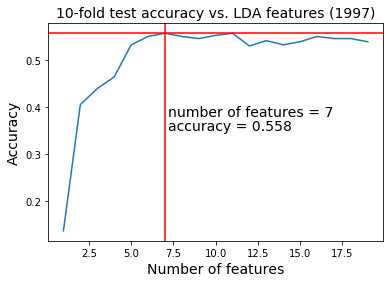

In [9]:
x = range(1,20)
plt.plot(x,A_1997)
plt.axvline(x=7.0,color='r')
plt.axhline(y=0.558,color='r')
plt.text(7.2,0.38,'number of features = 7',fontsize=14)
plt.text(7.2,0.35,'accuracy = 0.558',fontsize=14)
plt.xlabel('Number of features',fontsize=14)
plt.ylabel('Accuracy',fontsize=14)
plt.title('10-fold test accuracy vs. LDA features (1997)',fontsize=14)
plt.show()

In [10]:
A = []
for i in range(1,20):
    features = features_0.iloc[:,:i]
    a = 0
    for train, test in kf.split(features):
        #print('TRAIN: ',train,'test: ',test)
        X_train, X_test = features.iloc[train,:], features.iloc[test,:]
        y_train, y_test = Pos[train], Pos[test]
    
        clf = LogisticRegressionCV(multi_class='multinomial')
        clf.fit(X_train,y_train)
        #print(clf.score(X_train,y_train))
        y_p = clf.predict(X_test)
        c_m = confusion_matrix(y_test,y_p,labels=["SG","PG","SF","C","PF"])
        accuracy = np.sum(c_m.diagonal())/np.sum(c_m)
        #print(accuracy)
        a += accuracy
    
    A.append(a/10)
print(A)

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2

[0.17704081632653063, 0.430187074829932, 0.42423469387755103, 0.43660714285714286, 0.6052721088435373, 0.5989795918367348, 0.6008503401360545, 0.6215136054421768, 0.6359268707482992, 0.6360119047619048, 0.6380102040816327, 0.6359268707482993, 0.6071428571428571, 0.6008928571428571, 0.604719387755102, 0.5947278911564626, 0.5947278911564626, 0.5968537414965986, 0.590561224489796]


/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [27]:
clf = LogisticRegressionCV(multi_class='multinomial')
clf.fit(features_0.iloc[:,:11],Pos)

Pos_2016 = df_2016.iloc[:,3]
features_0_2016 = df_2016.iloc[:,4:5].join(df_2016.iloc[:,13:19]).join(df_2016.iloc[:,22:26]).join(df_2016.iloc[:,28:33]).join(df_2016.iloc[:,35:36]).join(
df_2016.iloc[:,38:39]).join(df_2016.iloc[:,41:43])
features_2016 = features_0_2016.iloc[:,:11]

y_p = clf.predict(features_2016)
c_m = confusion_matrix(Pos_2016,y_p,labels=["SG","PG","SF","C","PF"])
print(c_m)
print('accuracy: ', np.sum(c_m.diagonal())/np.sum(c_m))

for pos,pos_p,name in zip(Pos_2016,y_p,df_2016.iloc[:,2]):
    if pos == 'PG' and pos_p == 'PF':
        print('PG classified as PF:', name)
    elif pos == 'PG' and pos_p == 'SF':
        print('PG classified as SF:', name)
    elif pos == 'SF' and pos_p == 'PG':
        print('SF classified as PG:', name)
    elif pos == 'C' and pos_p == 'SG':
        print('C classified as SG:', name)
    elif pos == 'PF' and pos_p == 'PG':
        print('PF classified as PG:', name)
    elif pos == 'C' and pos_p == 'SF':
        print('C classified as SF:', name)

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[[66 14 13  0  4]
 [15 79  0  0  1]
 [28  2 47  0 15]
 [ 2  0  1 64 24]
 [ 7  0 14 33 49]]
accuracy:  0.6380753138075314
PG classified as PF: Giannis Antetokounmpo
SF classified as PG: Nicolas Batum
C classified as SG: Matt Bonner
SF classified as PG: Kobe Bryant
C classified as SG: Nikola Pekovic
C classified as SF: Jarnell Stokes


/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [17]:
A_1997 = []
for i in range(1,20):
    features = features_0_1997.iloc[:,:i]
    a = 0
    for train, test in kf.split(features):
        #print('TRAIN: ',train,'test: ',test)
        X_train, X_test = features.iloc[train,:], features.iloc[test,:]
        y_train, y_test = Pos_1997[train], Pos_1997[test]
    
        clf = LogisticRegressionCV(multi_class='multinomial')
        clf.fit(X_train,y_train)
        #print(clf.score(X_train,y_train))
        y_p = clf.predict(X_test)
        c_m = confusion_matrix(y_test,y_p,labels=["SG","PG","SF","C","PF"])
        accuracy = np.sum(c_m.diagonal())/np.sum(c_m)
        #print(accuracy)
        a += accuracy
    
    A_1997.append(a/10)
print(A_1997)

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2

[0.19964646464646468, 0.416969696969697, 0.46237373737373727, 0.4713636363636363, 0.5462626262626262, 0.5416666666666666, 0.5644949494949495, 0.5737878787878788, 0.5622727272727273, 0.5487878787878787, 0.5578787878787879, 0.5646464646464647, 0.5895959595959596, 0.5782323232323232, 0.5374242424242424, 0.5577777777777777, 0.5486868686868687, 0.5532323232323233, 0.56010101010101]


/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [28]:
clf = LogisticRegressionCV(multi_class='multinomial')
clf.fit(features_0_1997.iloc[:,:8],Pos_1997)

Pos_1996 = df_1996.iloc[:,3]
features_0_1996 = df_1996.iloc[:,4:5].join(df_1996.iloc[:,13:19]).join(df_1996.iloc[:,22:26]).join(df_1996.iloc[:,28:33]).join(df_1996.iloc[:,35:36]).join(
df_1996.iloc[:,38:39]).join(df_1996.iloc[:,41:43])
features_1996 = features_0_1996.iloc[:,:8]

y_p = clf.predict(features_1996)
c_m = confusion_matrix(Pos_1996,y_p,labels=["SG","PG","SF","C","PF"])
print(c_m)
print('accuracy: ', np.sum(c_m.diagonal())/np.sum(c_m))

for pos,pos_p,name in zip(Pos_1996,y_p,df_1996.iloc[:,2]):
    if pos == 'SG' and pos_p == 'PF':
        print('SG classified as PF:', name)
    elif pos == 'PG' and pos_p == 'SF':
        print('PG classified as SF:', name)
    elif pos == 'SF' and pos_p == 'PG':
        print('SF classified as PG:', name)
    elif pos == 'C' and pos_p == 'SG':
        print('C classified as SG:', name)
    elif pos == 'PF' and pos_p == 'PG':
        print('PF classified as PG:', name)
    #elif pos == 'C' and pos_p == 'SF':
     #   print('C classified as SF:', name)

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[[56  8 10  0  1]
 [12 76  2  0  0]
 [20  1 33  0 29]
 [ 1  0  7 44 32]
 [ 3  1 13 20 61]]
accuracy:  0.627906976744186
PG classified as SF: Corey Beck
SG classified as PF: Donnie Boyce
C classified as SG: Kevin Duckworth
PF classified as PG: Magic Johnson*
PG classified as SF: Reggie Jordan
SF classified as PG: Chris Mullin*


/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


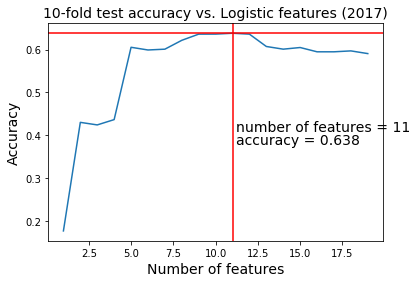

In [14]:
x = range(1,20)
plt.plot(x,A)
plt.axvline(x=11.0,color='r')
plt.axhline(y=0.638,color='r')
plt.text(11.2,0.38,'accuracy = 0.638',fontsize=14)
plt.text(11.2,0.41,'number of features = 11',fontsize=14)
plt.xlabel('Number of features',fontsize=14)
plt.ylabel('Accuracy',fontsize=14)
plt.title('10-fold test accuracy vs. Logistic features (2017)',fontsize=14)
plt.show()

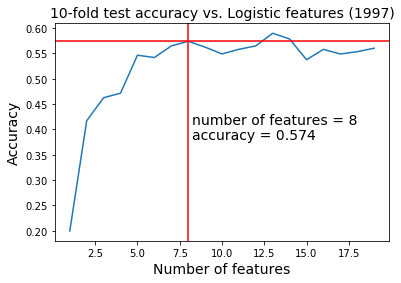

In [19]:
x = range(1,20)
plt.plot(x,A_1997)
plt.axvline(x=8.0,color='r')
plt.axhline(y=0.574,color='r')
plt.text(8.2,0.38,'accuracy = 0.574',fontsize=14)
plt.text(8.2,0.41,'number of features = 8',fontsize=14)
plt.xlabel('Number of features',fontsize=14)
plt.ylabel('Accuracy',fontsize=14)
plt.title('10-fold test accuracy vs. Logistic features (1997)',fontsize=14)
plt.show()

In [29]:
from sklearn.ensemble import RandomForestClassifier

A = []
for i in range(1,20):
    features = features_0.iloc[:,:i]
    a = 0
    for train, test in kf.split(features):
        #print('TRAIN: ',train,'test: ',test)
        X_train, X_test = features.iloc[train,:], features.iloc[test,:]
        y_train, y_test = Pos[train], Pos[test]
    
        clf = RandomForestClassifier()
        clf.fit(X_train,y_train)
        #print(clf.score(X_train,y_train))
        y_p = clf.predict(X_test)
        c_m = confusion_matrix(y_test,y_p,labels=["SG","PG","SF","C","PF"])
        accuracy = np.sum(c_m.diagonal())/np.sum(c_m)
        #print(accuracy)
        a += accuracy
    print(a/10)
    A.append(a/10)
print(A)

/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

0.23869047619047618
0.3722789115646258


/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

0.4321428571428572
0.41347789115646255


/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

0.5597789115646259


/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

0.5392006802721088


/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

0.5701105442176871


/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

0.5597363945578231


/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

0.5821003401360545


/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

0.5909013605442177


/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

0.5824404761904761


/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

0.543154761904762
0.5885204081632653


/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

0.5577380952380953


/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

0.5557397959183674


/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

0.5881802721088436


/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

0.5700680272108843
0.5847789115646258


/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

0.6009353741496598
[0.23869047619047618, 0.3722789115646258, 0.4321428571428572, 0.41347789115646255, 0.5597789115646259, 0.5392006802721088, 0.5701105442176871, 0.5597363945578231, 0.5821003401360545, 0.5909013605442177, 0.5824404761904761, 0.543154761904762, 0.5885204081632653, 0.5577380952380953, 0.5557397959183674, 0.5881802721088436, 0.5700680272108843, 0.5847789115646258, 0.6009353741496598]


/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

In [30]:
clf = RandomForestClassifier()
clf.fit(features_0.iloc[:,:8],Pos)

Pos_2016 = df_2016.iloc[:,3]
features_0_2016 = df_2016.iloc[:,4:5].join(df_2016.iloc[:,13:19]).join(df_2016.iloc[:,22:26]).join(df_2016.iloc[:,28:33]).join(df_2016.iloc[:,35:36]).join(
df_2016.iloc[:,38:39]).join(df_2016.iloc[:,41:43])
features_2016 = features_0_2016.iloc[:,:8]

y_p = clf.predict(features_2016)
c_m = confusion_matrix(Pos_2016,y_p,labels=["SG","PG","SF","C","PF"])
print(c_m)
print('accuracy: ', np.sum(c_m.diagonal())/np.sum(c_m))

for pos,pos_p,name in zip(Pos_2016,y_p,df_2016.iloc[:,2]):
    if pos == 'SG' and pos_p == 'C':
        print('SG classified as C:', name)
    elif pos == 'PG' and pos_p == 'SF':
        print('PG classified as SF:', name)
    elif pos == 'SF' and pos_p == 'C':
        print('SF classified as C:', name)

[[54 19 18  1  5]
 [11 78  3  1  2]
 [23  4 43  4 18]
 [ 0  0  6 60 25]
 [ 4  0 15 33 51]]
accuracy:  0.5983263598326359
SF classified as C: Carmelo Anthony
SF classified as C: Nicolas Batum
SG classified as C: Pat Connaughton
SF classified as C: Duje Dukan
PG classified as SF: Langston Galloway
PG classified as SF: Andrew Goudelock
SF classified as C: Rondae Hollis-Jefferson
PG classified as SF: Marcus Smart


/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
A_1997 = []
for i in range(1,20):
    features = features_0_1997.iloc[:,:i]
    a = 0
    for train, test in kf.split(features):
        #print('TRAIN: ',train,'test: ',test)
        X_train, X_test = features.iloc[train,:], features.iloc[test,:]
        y_train, y_test = Pos_1997[train], Pos_1997[test]
    
        clf = RandomForestClassifier()
        clf.fit(X_train,y_train)
        #print(clf.score(X_train,y_train))
        y_p = clf.predict(X_test)
        c_m = confusion_matrix(y_test,y_p,labels=["SG","PG","SF","C","PF"])
        accuracy = np.sum(c_m.diagonal())/np.sum(c_m)
        #print(accuracy)
        a += accuracy
    #print(a/10)
    A_1997.append(a/10)
print(A_1997)

In [31]:
clf = RandomForestClassifier()
clf.fit(features_0_1997.iloc[:,:8],Pos_1997)

Pos_1996 = df_1996.iloc[:,3]
features_0_1996 = df_1996.iloc[:,4:5].join(df_1996.iloc[:,13:19]).join(df_1996.iloc[:,22:26]).join(df_1996.iloc[:,28:33]).join(df_1996.iloc[:,35:36]).join(
df_1996.iloc[:,38:39]).join(df_1996.iloc[:,41:43])
features_1996 = features_0_1996.iloc[:,:8]

y_p = clf.predict(features_1996)
c_m = confusion_matrix(Pos_1996,y_p,labels=["SG","PG","SF","C","PF"])
print(c_m)
print('accuracy: ', np.sum(c_m.diagonal())/np.sum(c_m))

for pos,pos_p,name in zip(Pos_1996,y_p,df_1996.iloc[:,2]):
    if pos == 'SG' and pos_p == 'PF':
        print('SG classified as PF:', name)
    elif pos == 'PG' and pos_p == 'SF':
        print('PG classified as SF:', name)
    elif pos == 'PG' and pos_p == 'C':
        print('PG classified as C:', name)
    elif pos == 'PG' and pos_p == 'PF':
        print('PG classified as PF:', name)
    elif pos == 'PF' and pos_p == 'PG':
        print('PF classified as PG:', name)

[[41 14 19  0  1]
 [ 9 75  5  0  1]
 [19  0 42  7 15]
 [ 2  0  3 62 17]
 [ 5  0 15 34 44]]
accuracy:  0.6139534883720931
PG classified as PF: Corey Beck
PG classified as SF: Reggie Jordan
PG classified as SF: Jason Kidd
PG classified as SF: Nate McMillan
SG classified as PF: Tracy Moore
PG classified as SF: Charlie Ward
PG classified as SF: Micheal Williams


/home/cchang373/anaconda2/envs/rdkit3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
x = range(1,20)
plt.plot(x,A)
plt.axvline(x=12.0,color='r')
plt.axhline(y=0.615,color='r')
plt.text(12.2,0.38,'accuracy = 0.615',fontsize=14)
plt.text(12.2,0.41,'number of features = 12',fontsize=14)
plt.xlabel('Number of features',fontsize=14)
plt.ylabel('Accuracy',fontsize=14)
plt.title('10-fold test accuracy vs. Random forest features (2017)',fontsize=14)
plt.show()

In [ ]:
x = range(1,20)
plt.plot(x,A_1997)
plt.axvline(x=9.0,color='r')
plt.axhline(y=0.580,color='r')
plt.text(9.2,0.38,'accuracy = 0.580',fontsize=14)
plt.text(9.2,0.41,'number of features = 8',fontsize=14)
plt.xlabel('Number of features',fontsize=14)
plt.ylabel('Accuracy',fontsize=14)
plt.title('10-fold test accuracy vs. Random forest features (1997)',fontsize=14)
plt.show()

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

In [33]:
features_97 = pca.fit(features_0_1997).transform(features_0_1997)
features = pca.fit(features_0).transform(features_0)

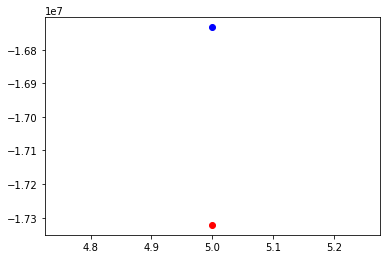

In [34]:
from sklearn.cluster import KMeans
s = []
s_97 = []
i = [5]
for j in i:
    kmeans = KMeans(n_clusters=j).fit(features)
    kmeans_97 = KMeans(n_clusters=j).fit(features_97)
    y_p = kmeans.predict(features)
    y_p_97 = kmeans.predict(features_97)
    score = kmeans.score(features)
    score_97 = kmeans.score(features_97)
    s.append(score)
    s_97.append(score_97)

plt.plot(i,s,'ro')
plt.plot(i,s_97,'bo')
plt.show()

In [48]:
y_p = kmeans.predict(features_97)
print(kmeans.score(features_97))

-16733278.366015991


In [49]:
#print(y_p[:100])
#print(name_2017[:100])
name_dict={}
for y,name,pos in zip(y_p,name_1997,Pos_1997):
    name_dict[name] = [y,pos]
#print(name_dict)
#print(Pos[:5])
#print(features_0.iloc[:5,0])

In [50]:
SG,PG,PF,SF,C =[],[],[],[],[]
n = len(name_1997)
l = ['SG','PG','PF','SF','C']
for num,name in enumerate(name_1997):
    if Pos[num] == 'SG':
        SG.append(y_p[num])
    elif Pos[num] == 'PG':
        PG.append(y_p[num])
    elif Pos[num] == 'PF':
        PF.append(y_p[num])
    elif Pos[num] == 'SF':
        SF.append(y_p[num])
    elif Pos[num] == 'C':
        C.append(y_p[num])
la = [SG,PG,PF,SF,C]
#print(SG)

Text(0.5, 1.0, 'C')

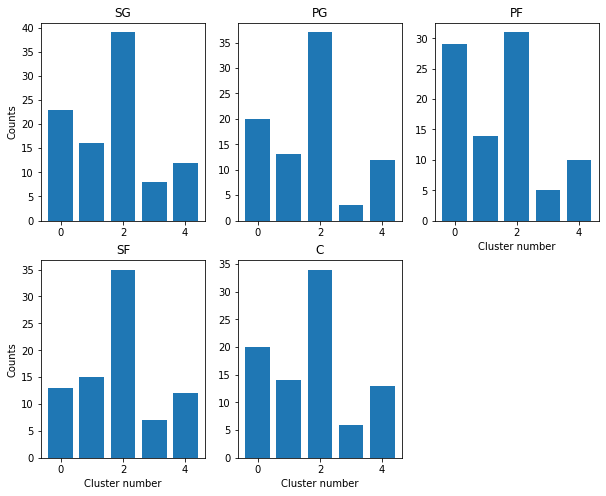

In [51]:
fig = plt.figure(figsize=(10,8))
numbers=[]
for idx,pos in enumerate(l):
    number = []
    for i in range(0,5):
        n = len([j for j in la[idx] if j == i])
        number.append(n)
    numbers.append(number)
    
fig.add_subplot(231)
plt.bar(range(0,5),numbers[0])
plt.ylabel('Counts')
plt.title('SG')
fig.add_subplot(232)
plt.bar(range(0,5),numbers[1])
plt.title('PG')
fig.add_subplot(233)
plt.bar(range(0,5),numbers[2])
plt.xlabel('Cluster number')
plt.title('PF')
fig.add_subplot(234)
plt.bar(range(0,5),numbers[3])
plt.ylabel('Counts')
plt.xlabel('Cluster number')
plt.title('SF')
fig.add_subplot(235)
plt.bar(range(0,5),numbers[4])
plt.xlabel('Cluster number')
plt.title('C')